In [1]:
using Plots
using LinearAlgebra
using Revise
using Optim
using Zygote
using LaTeXStrings
using MultiFloats
using SparseIR
using Nevanlinna

In [2]:
T = BigFloat

BigFloat

In [3]:
beta::Float64 = 100
wmax::Float64 = 10
basis = FiniteTempBasisSet(Float64(beta), Float64(wmax), 1e-15) 

LoadError: InterruptException:

In [4]:
include("../flex_src/IRFLEX.jl")

Main.IRFLEX

In [5]:
nsize::Int64 = 4096
t_pra::Float64 = 0.0
filling::Float64 = 1.0
#U::Float64 = 0.2
#function single_Hami(x::Float64, y::Float64, t::Float64, t_pra::Float64)::Float64
#    e::Float64 = -2.0*t*(cos(x)+cos(y)) + 4.0*t_pra*cos(x)*cos(y)                   
#end
#hami::Function = (x,y) -> single_Hami(x,y,0.5,t_pra)
U::Float64 = 0.6
hami::Function = (x,y) -> IRFLEX.single_Hami(x,y,t_pra)
lat = IRFLEX.SingleLatticeModel(nsize, filling, U, SparseIR.β(basis), hami)
;

LoadError: UndefVarError: basis not defined

In [6]:
ratio_U = 0.0
precision = 1e-4
loose_precision = 1e+3*precision
gkf0 = IRFLEX.make_free_giw(lat, basis)
;

LoadError: UndefVarError: lat not defined

In [7]:
# Compute chi0
chi0kf = IRFLEX.calc_chi0(gkf0, lat, basis)
;

LoadError: UndefVarError: gkf0 not defined

In [8]:
# Compute chi
chiskf = chi0kf ./ (1.0 .- lat.U*chi0kf)
;

LoadError: UndefVarError: lat not defined

In [9]:
hnw = (length(basis.smpl_wn_b.sampling_points)-1)÷2

LoadError: UndefVarError: basis not defined

In [10]:
myx = (2 .* collect(1:nsize) .- 1) ./ nsize
myy = (2 .* collect(1:nsize) .- 1) ./ nsize
heatmap(myx, myy, real.(gkf0[hnw+1,:,:]), 
    title=latexstring("\\mathrm{Re}\\,G(k,i\\omega_0)"), xlabel=latexstring("k_x/\\pi"), ylabel=latexstring("k_y/\\pi"), 
    c=:viridis, 
    xlim = (0,2), ylim = (0,2), aspect_ratio=1.0, size=(370,300))

LoadError: UndefVarError: hnw not defined

In [11]:
# plot 2D k-dependence of lowest Matsubara frequency of e.g. chi0
myx = (2 .* collect(1:nsize) .- 1) ./ nsize
myy = (2 .* collect(1:nsize) .- 1) ./ nsize
heatmap(myx, myy, real.(chiskf[hnw+1,:,:]),
    title=latexstring("\\mathrm{Re}\\,\\chi(k,i\\nu_0)"), xlabel=latexstring("k_x/\\pi"), ylabel=latexstring("k_y/\\pi"),
    c=:viridis,
    xlim = (0,2), ylim = (0,2), aspect_ratio=1.0, size=(370,300))

LoadError: UndefVarError: hnw not defined

In [12]:
chiskf[hnw+1,nsize÷2+1, nsize÷2+1]

LoadError: UndefVarError: hnw not defined

In [13]:
#smpl_wn_b = SparseIR.default_matsubara_sampling_points(basis.basis_b)
#smpl_wn_b = smpl_wn_b[smpl_wn_b .!= BosonicFreq(0)]
#smpl_wn_b_wo_zero = MatsubaraSampling(basis.basis_b, smpl_wn_b)
;

In [14]:
chisf = chi0kf[:,nsize÷2+1, nsize÷2+1]
#deleteat!(chisf, hnw+1)
#chisl = fit(smpl_wn_b_wo_zero, chisf, dim=1)
#chisf[37] = 0
chisl = fit(basis.smpl_wn_b, chisf, dim=1)
;

LoadError: UndefVarError: chi0kf not defined

In [15]:
plot(yaxis=:log,ylims=(1e-16,10))
#plot()
plot!(real.(chisl),label="chi_l")
plot!(real.(basis.basis_b.s),label="s")

LoadError: UndefVarError: chisl not defined

In [16]:
SparseIR.sampling_points(basis.smpl_wn_f)[1].n

LoadError: UndefVarError: basis not defined

In [19]:
sampling_points_dense = SparseIR.FermionicFreq.(collect(basis.wn_f[1].n:2:basis.wn_f[length(basis.wn_f)].n))
smpl_wn_f_dense = MatsubaraSampling(basis.basis_f, sampling_points_dense)
;

In [20]:
dense_hnw = length(sampling_points_dense) ÷ 2

2293

In [21]:
#smpl_wn_b_dense = MatsubaraSampling(basis.basis_b, SparseIR.BosonicFreq.(collect(-2332:2:2332)))
#chisl_d = fit(basis.smpl_wn_b, chisf)
#chisf_d = evaluate(smpl_wn_b_dense, chisl_d)
#deleteat!(chisf_d, 1167)
#chisf_d[1167]=0.0
#chisl_d = fit(smpl_wn_b_dense, chisf_d)
;

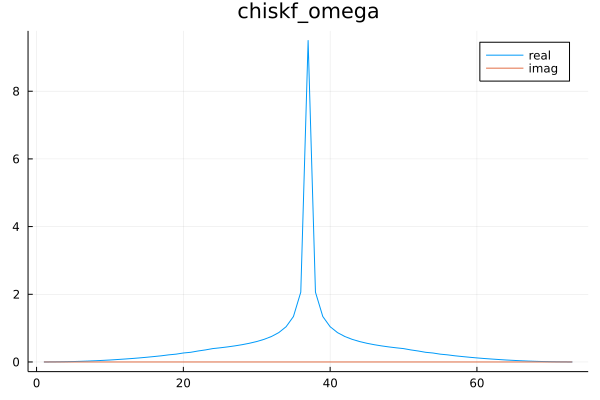

In [22]:
plot(title="chiskf_omega")
plot!(real.(chisf), label="real")
plot!(imag.(chisf), label="imag")

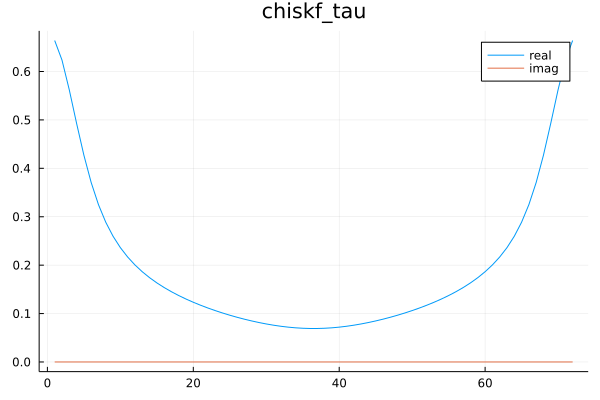

In [23]:
chist = evaluate(basis.smpl_tau_b, chisl)
plot(title="chiskf_tau")
plot!(real.(chist[:]), label="real")
plot!(imag.(chist[:]), label="imag")

In [24]:
#chisw = evaluate(basis.smpl_wn_f, chisl)
chisw = evaluate(smpl_wn_f_dense, chisl)
;

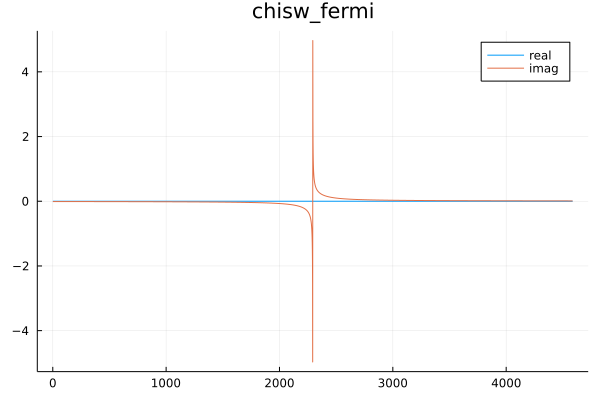

In [25]:
plot(title="chisw_fermi")
plot!(real.(chisw[:]), label="real")
plot!(imag.(chisw[:]), label="imag")

In [26]:
sum_rule = Float64(real(dot(basis.basis_f.u(SparseIR.β(basis)), chisl) + dot(basis.basis_f.u(0), chisl)))

1.3484703365942339

In [27]:
setprecision(512)

512

In [28]:
input_chi  = Array{Complex{T}}(undef, dense_hnw) 
input_smpl = Array{Complex{T}}(undef, dense_hnw) 
;

In [29]:
for i in 1:dense_hnw
    input_smpl[i] = SparseIR.valueim(sampling_points_dense[dense_hnw+i], SparseIR.β(basis))
    input_chi[i]  = -chisw[dense_hnw+i]
end

In [30]:
N_real    =  10000
omega_max =  10.0
eta       =  0.01
H_max     =  50
ab_coeff  = zeros(ComplexF64, 2*H_max) 
lambda    = 1e-4
#1000 → 2000
iter_tol  = 1000
N_imag    =  Nevanlinna.calc_opt_N_imag(dense_hnw, input_smpl, input_chi)
#N_imag = dense_hnw 
println("N_imag $(N_imag)")

N_imag is setted as 22
N_imag 22


In [31]:
imaginary = Nevanlinna.ImagDomainData(input_smpl, input_chi, N_imag)
raw_reals = Nevanlinna.RealDomainData(N_real, omega_max, eta, sum_rule, T=T)
println(typeof(imaginary))
println(typeof(raw_reals))

phis = Nevanlinna.calc_phis(imaginary)
abcd = Nevanlinna.calc_abcd(imaginary, raw_reals, phis)
hardy_matrix = Nevanlinna.calc_hardy_matrix(raw_reals, H_max)

Nevanlinna.evaluation!(raw_reals, abcd, H_max, ab_coeff, hardy_matrix)

Pick matrix is positive semi-definite.
ImagDomainData{BigFloat}
RealDomainData{BigFloat}
max_theta=0.0
hardy optimization was success.


true

In [32]:
function exact_suscep(qx, qy, omega, nsize, beta, hami)
    chi = zeros(ComplexF64, length(omega))
    for iomega in 1:length(omega)
        for ix in 1:nsize, iy in 1:nsize
            kx::Float64 = 2*π*(ix-1)/nsize
            ky::Float64 = 2*π*(iy-1)/nsize
            ek  = hami(kx,ky)
            ekq = hami(kx-qx,ky-qy)
            chi[iomega] += -(IRFLEX.fermi_dirac(ekq,beta)-IRFLEX.fermi_dirac(ek,beta))/(omega[iomega]+ekq-ek)
        end
        chi[iomega] = chi[iomega]/(nsize*nsize)
    end
    return chi
end

exact_suscep (generic function with 1 method)

In [33]:
exa_freq = Array{Complex{T}}(collect(LinRange(-omega_max, omega_max, 1000))) .+ eta * im
exa_chi = exact_suscep(π,π,ComplexF64.(exa_freq),nsize,SparseIR.β(basis),hami)
;

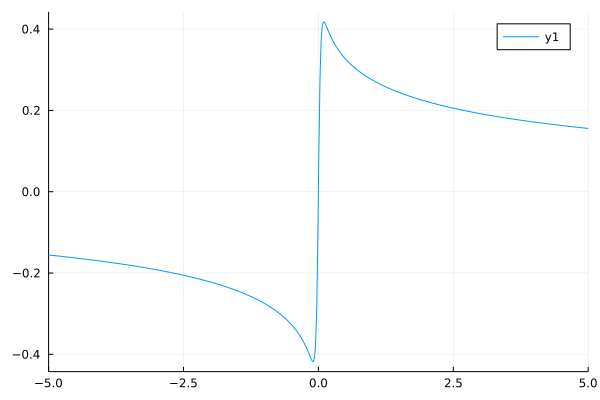

In [34]:
plot(xlim = [-5,5])
plot!(real.(exa_freq), imag.(exa_chi))

In [35]:
exa_chis = exa_chi ./ (1.0 .- lat.U*exa_chi)
;

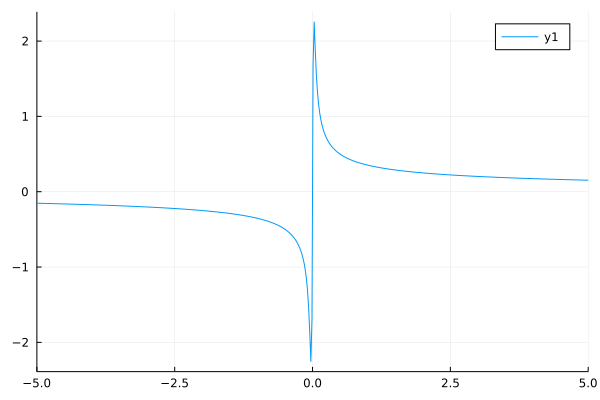

In [36]:
plot(xlim = [-5,5])
plot!(real.(exa_freq), imag.(exa_chis))

In [37]:
@time sol = Nevanlinna.NevanlinnaSolver(N_imag, input_smpl, input_chi, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, true)
;

Pick matrix is positive semi-definite.
H=1
Iter     Function value   Gradient norm 
     0     8.425982e+02     3.353978e+02
 * time: 0.016448020935058594
     1     8.117083e+02     2.602290e+02
 * time: 3.69486403465271
     2     7.916848e+02     1.782868e+02
 * time: 8.226381063461304
     3     7.816166e+02     1.225994e+02
 * time: 10.72520399093628
     4     7.716103e+02     6.017473e+01
 * time: 12.800507068634033
     5     7.708337e+02     9.554721e+00
 * time: 14.873512029647827
     6     7.707415e+02     1.580786e+00
 * time: 16.94816493988037
     7     7.707398e+02     4.176285e-01
 * time: 20.054664850234985
     8     7.707397e+02     6.079716e-02
 * time: 25.845520973205566
     9     7.707397e+02     7.427860e-03
 * time: 27.24551296234131
    10     7.707397e+02     1.184125e-03
 * time: 29.340905904769897
    11     7.707397e+02     1.953834e-04
 * time: 30.748058080673218
    12     7.707397e+02     4.310545e-05
 * time: 32.89214205741882
    13     7.707397e+02 

In [38]:
@time Nevanlinna.solve!(sol)
;

H=1
Iter     Function value   Gradient norm 
     0     7.707397e+02     5.373308e-09
 * time: 0.000225067138671875
max_theta=0.214659918628580944425522852428032367661166625439119487171745199394077420719183025551584222171565829604712792989024661370508718105202976515297915960082639408
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     7.707397e+02     9.175409e+02
 * time: 0.00021696090698242188
     1     5.743743e+02     7.780346e+02
 * time: 12.408820867538452
     2     2.313107e+02     1.238496e+02
 * time: 18.83315896987915
     3     2.285486e+02     1.203022e+02
 * time: 20.889400959014893
     4     2.264085e+02     1.289510e+02
 * time: 24.40665292739868
     5     2.168259e+02     1.106261e+02
 * time: 27.883354902267456
     6     1.997320e+02     1.593407e+02
 * time: 31.35821795463562
     7     1.756566e+02     5.521444e+01
 * time: 34.8280930519104
     8     1.609045e+02     1.100174e+02
 * time: 40.3757688999176
     9     1.594944e

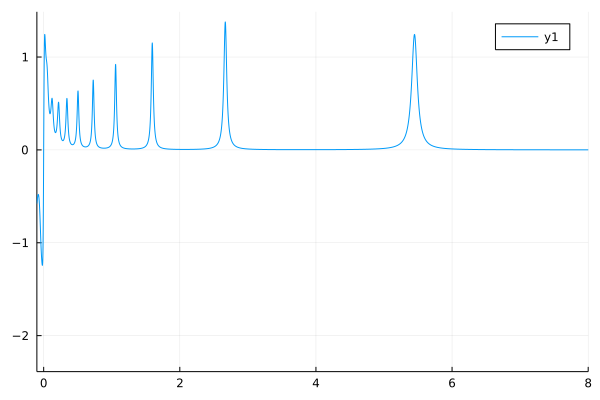

In [39]:
plot(xlim = [-0.1,8])
plot!(real.(raw_reals.freq), imag.(raw_reals.val/pi).*tanh.(0.5*SparseIR.β(basis)*real.(raw_reals.freq)))
#plot!(real.(sol.reals.freq), imag.(sol.reals.val/pi).*tanh.(0.5*SparseIR.β(basis)*real.(raw_reals.freq)))

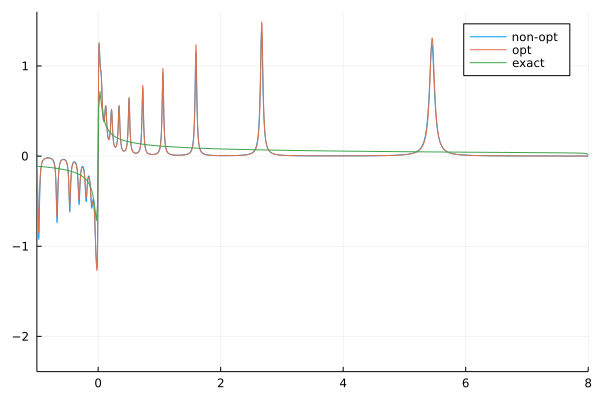

In [42]:
plot(xlim = [-1,8])
#plot!(real.(raw_reals.freq), imag.(raw_reals.val/pi).*tanh.(0.5*SparseIR.β(basis)*real.(raw_reals.freq)),label="non-opt", marker=:+)
plot!(real.(raw_reals.freq), imag.(raw_reals.val/pi).*tanh.(0.5*SparseIR.β(basis)*real.(raw_reals.freq)),label="non-opt")
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val/pi)).*tanh.(0.5*SparseIR.β(basis)*real.(sol.reals.freq)),label="opt")
plot!(real.(exa_freq), imag.(exa_chis)/pi,label="exact")

In [41]:
plot(xlim = [-2,8])
plot!(real.(raw_reals.freq), imag.(raw_reals.val/pi),marker=:+)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val/pi)))

In [40]:
ComplexF64.(raw_reals.freq[1])

-10.0 + 0.01im